# News and Marketing Campaigns

In [1]:
import numpy as np
import pandas as pd
import re
import string
import unidecode #pip install unidecode
%matplotlib inline
import matplotlib.pyplot as plt

# Read original csv file
df0 = pd.read_csv('tweets_public.csv', encoding='utf-16', index_col='tweet_id', sep=',')
# Keep relevant columns only
df = df0.drop(['retweet_count','is_reply','reply_count'], axis=1)
df.head()

,airline_sentiment,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,
942743012337123328,positive,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,Mon Dec 18 13:07:04 +0000 2017,NaN,Dublin
926857871916183553,positive,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,Sat Nov 04 17:05:11 +0000 2017,NaN,NaN
936979305720090626,neutral,@Iberia Me dirías por favor que costo tiene?,NaN,Sat Dec 02 15:24:09 +0000 2017,NaN,NaN
943983853802328064,negative,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,Thu Dec 21 23:17:43 +0000 2017,NaN,Central Time (US & Canada)
938207464457211904,negative,@SrtaFarrellDM @KLM @Iberia Eso de avianca es ...,NaN,Wed Dec 06 00:44:25 +0000 2017,NaN,Eastern Time (US & Canada)


In [2]:
def delete_urlvideo(tweet):
    #Delete URLs www.* or https?://*
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    #Delete VIDEO
    tweet = re.sub('((\[VIDEO\])|(#VIDEO)|#vIDEO)','',tweet)
    return tweet

df['cleantext'] = df['text'].apply(delete_urlvideo)

# Count the ocurrences of each unique element in the 'nourl' column
unicos = df['cleantext'].value_counts()
diff_tweets = unicos.index.tolist() # List of unique tweets
num_occurences = unicos.values.tolist() # List of occurences
print(unicos)

Con @Iberia, mi destino a un solo click. ¡Deseadme suerte! #HolaColombia. Hola 79 destinos europeos al mejor precio                             153
Con @Iberia, mi destino a un solo click. ¡Deseadme suerte! #HolaArgentina. Hola 79 destinos europeos al mejor precio                            149
Así fue el accidente del vuelo 5022 de Spanair, el más letal en España en 2 décadas                                                             123
Iberia Plus cumple 25 años. Queremos celebrarlo contigo de una manera muy especial. Elige tu número favorito y... ¡…                             79
@Iberia RT POR FAVOR: PASAJEROS QUE IBERIA LES DEMORA LA DEVOLUCION DEL DINERO. JODAMOSLOS. RETUITEEMOS y COMPARTAM…                             22
Japón Directo, vuelo con IBERIA a Tokyo, 10 días desde 2.990€ Tax Incl.                                                                          19
Ryanair retrasa hasta el 15 enero su cambio en la política de equipaje de mano                                  

In [3]:
# Force the 'nourl' column to be the index
df1 = df.set_index('cleantext')
# Select only airline_sentiment and create a one-hot encoding.
textVSsentiment = pd.get_dummies(df1['airline_sentiment'])
textVSsentiment.head()

,negative,neutral,positive
cleantext,,,
"""Los pilotos de Ryanair desconvocan la huelga tras ver reconocidos sus sindicatos"" by El País via Últimas noticias…",0,0,1
"@Iberia @lavecinarubia Si ,por favor las declaraciones de amor entre los #rubijarena no pueden quedarse en una ma…",0,0,1
@Iberia Me dirías por favor que costo tiene?,0,1,0
"@SupermanlopezN @Iberia @giroditalia Champion, no vuele más con esos descarados.",1,0,0
@SrtaFarrellDM @KLM @Iberia Eso de avianca es verdad a mi mama le paso dos veces terrible esa aerolínea 😤,1,0,0


In [4]:
sentiment_polls = textVSsentiment.groupby('cleantext').sum()
sentiment_polls['all'] = sentiment_polls.positive + sentiment_polls.negative + sentiment_polls.neutral

type(sentiment_polls)
sentiment_polls.sort_values('neutral',ascending=False)

,negative,neutral,positive,all
cleantext,,,,
"Con @Iberia, mi destino a un solo click. ¡Deseadme suerte! #HolaArgentina. Hola 79 destinos europeos al mejor precio",14,91,44,149
"Con @Iberia, mi destino a un solo click. ¡Deseadme suerte! #HolaColombia. Hola 79 destinos europeos al mejor precio",21,76,56,153
"Así fue el accidente del vuelo 5022 de Spanair, el más letal en España en 2 décadas",75,48,0,123
Iberia Plus cumple 25 años. Queremos celebrarlo contigo de una manera muy especial. Elige tu número favorito y... ¡…,7,36,36,79
Ryanair retrasa hasta el 15 enero su cambio en la política de equipaje de mano,4,9,4,17
"Japón Directo, vuelo con IBERIA a Tokyo, 10 días desde 2.990€ Tax Incl.",7,9,3,19
@Ryanair Madrid,1,8,0,9
@Ryanair Madrid #TravelThursday,3,7,3,13
"Descubre Shanghai, Vuelo Directo con Iberia, 5 días desde 963€ Tax Includ",0,6,2,8


In [5]:
sentiments = ['positive','negative','neutral']
for s in sentiments:
    sentiment_polls[s] = sentiment_polls.apply(lambda x: x[s]/x['all'], axis=1)
    
sentiment_polls.sort_values('all',ascending=False)

,negative,neutral,positive,all
cleantext,,,,
"Con @Iberia, mi destino a un solo click. ¡Deseadme suerte! #HolaColombia. Hola 79 destinos europeos al mejor precio",0.137255,0.496732,0.366013,153
"Con @Iberia, mi destino a un solo click. ¡Deseadme suerte! #HolaArgentina. Hola 79 destinos europeos al mejor precio",0.093960,0.610738,0.295302,149
"Así fue el accidente del vuelo 5022 de Spanair, el más letal en España en 2 décadas",0.609756,0.390244,0.000000,123
Iberia Plus cumple 25 años. Queremos celebrarlo contigo de una manera muy especial. Elige tu número favorito y... ¡…,0.088608,0.455696,0.455696,79
@Iberia RT POR FAVOR: PASAJEROS QUE IBERIA LES DEMORA LA DEVOLUCION DEL DINERO. JODAMOSLOS. RETUITEEMOS y COMPARTAM…,1.000000,0.000000,0.000000,22
"Japón Directo, vuelo con IBERIA a Tokyo, 10 días desde 2.990€ Tax Incl.",0.368421,0.473684,0.157895,19
Ryanair retrasa hasta el 15 enero su cambio en la política de equipaje de mano,0.235294,0.529412,0.235294,17
@Ryanair Madrid #TravelThursday,0.230769,0.538462,0.230769,13
Iberia inaugura un nuevo espacio Premium para sentirte como una reina o un rey,0.222222,0.000000,0.777778,9


In [20]:
# Delete those with 1 occurence or labeled unanonimously with one single sentiment
conflict = sentiment_polls[(sentiment_polls['positive'] < 1) & (sentiment_polls['negative'] < 1) & (sentiment_polls['neutral'] < 1)]
conflictsent = conflict.drop(['all'], axis=1)
conflictsent = conflictsent.sort_values('negative',ascending=True)

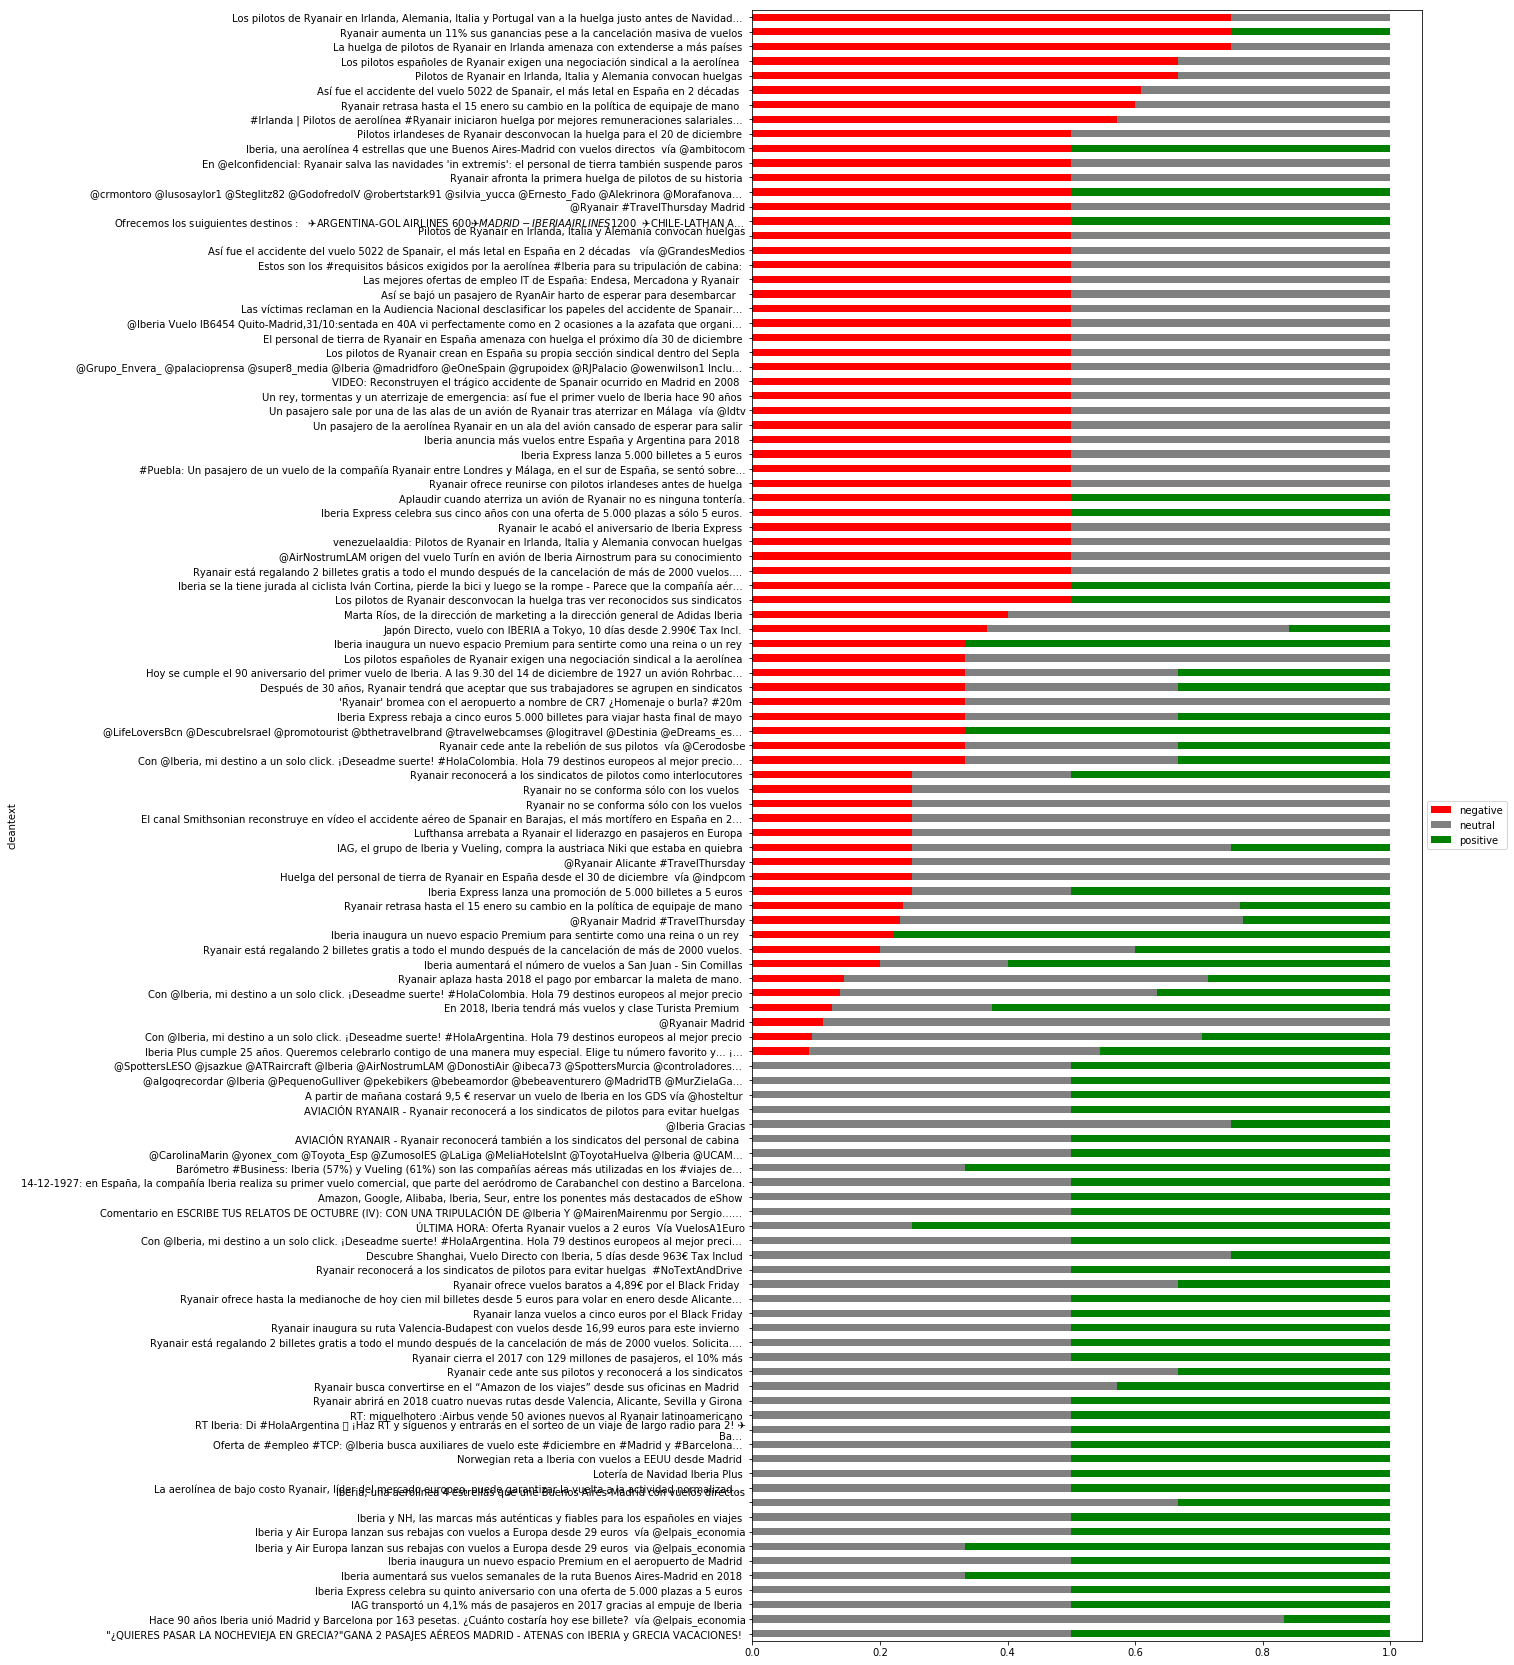

In [24]:
# Visualize the data

#plt.scatter(x, y, color=['red')
#plt.xlabel('Tweet')
#plt.ylabel('Labeling Percentage')

my_colors = ['r', 'gray', 'g'] 
ax = conflictsent.plot(kind='barh',stacked=True, color=my_colors,figsize=(12, 30))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
#plt.savefig("Value_Time_Country.png",dpi= 300, bbox_inches='tight')
plt.show()


In [10]:
# Lines plot
ax = conflict.plot(color=[sns.xkcd_rgb["pale red"], 
                      sns.xkcd_rgb["denim blue"], 
                      sns.xkcd_rgb["medium green"]])
ax.set_ylabel('Number of tweets')
ax.set_xlabel('Day of the week')

NameError: name 'sns' is not defined

In [ ]:
# Delete duplicated tweets
df2 = df.drop_duplicates(subset='cleantext',keep='first') 
df3 = df2.drop('cleantext',axis=1)
# df3 contains no repeated tweets!!

In [ ]:
df3.shape

In [ ]:
df.shape

In [ ]:
print(sum(num_occurences[0:205]))

In [ ]:
print('Number of tweets if we delete all duplicated tweets:',7867 - sum(num_occurences[0:205]))

In [ ]:
print('Number of tweets if we keep 1 duplicated tweet:',df3.shape)